In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=df83a2daf4786b2127311ff84153a05498b38687d0738bdbb2ca937a4cfe3fab
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

from tensorflow import keras

import os
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
DATA_PATH= 'drive/My Drive/MasterNU/RevisionBSLDigits/PickleData/'

In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  10000
Length of y:  10000


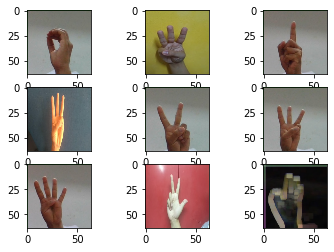

In [ ]:
# listRange = range(70, 79, 1)
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x[i])
plt.show()

In [ ]:
y[:9]

[0, 6, 1, 6, 2, 6, 4, 3, 9]

In [ ]:
x.shape

(10000, 64, 64, 3)

In [ ]:
IMG_SIZE = 64

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

In [ ]:
x.shape

(10000, 64, 64, 3)

In [ ]:
y.shape

(10000,)

In [ ]:
# x=x/255.0

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
print('xtrain shape: ', xtrain.shape)


xtrain shape:  (8000, 64, 64, 3)


In [ ]:
print('ytest shape: ', xtest.shape)

ytest shape:  (2000, 64, 64, 3)


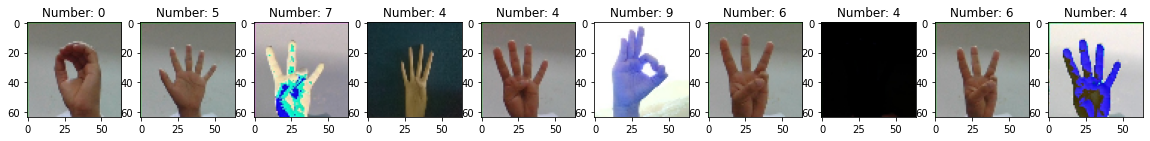

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtrain[900:910], ytrain[900:910])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
xtest.shape

(2000, 64, 64, 3)

In [ ]:
xtrain.ndim

4

In [ ]:

ytrain.shape

(1,)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=500, verbose=1)

In [ ]:
# logisticRegr.fit(xtrain, ytrain)
logisticRegr.fit(np.reshape(xtrain, (xtrain.shape[0], -1)), ytrain)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.5min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
#Test Acc
score = logisticRegr.score(np.reshape(xtest, (xtest.shape[0], -1)), ytest)
print(score*100,'%')

66.85 %


In [ ]:
score = logisticRegr.score(np.reshape(xtrain, (xtrain.shape[0], -1)), ytrain)
print(score*100,'%')

90.3 %


In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(xtest[300].reshape(1,-1))

array([4])

In [ ]:
predictions = logisticRegr.predict(np.reshape(xtest, (xtest.shape[0], -1)))

In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
correctClass =[]
for label, predict in zip(ytest, predictions):
  if label != predict:
    misclassifiedIndexes.append(index)
  else:
    correctClass.append(index)

  index +=1
print('Total number of misclassified class: ', len(misclassifiedIndexes))
print('Total number of correctly classified class: ', len(correctClass))
print('Total number testing data: ', len(misclassifiedIndexes)+len(correctClass))

Total number of misclassified class:  663
Total number of correctly classified class:  1337
Total number testing data:  2000


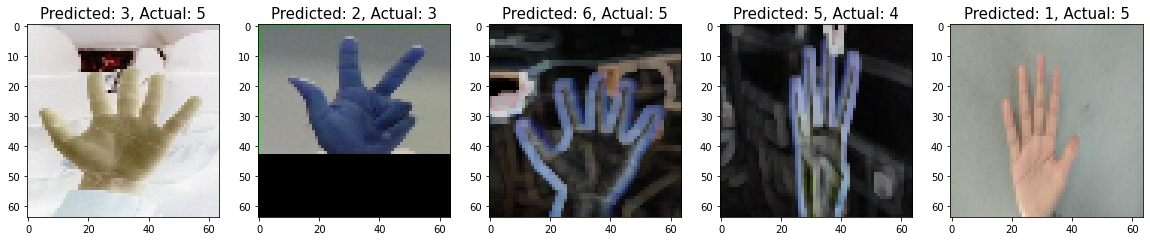

In [ ]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
#  plt.imshow(np.reshape(xtest[badIndex]))
 plt.imshow(xtest[badIndex])
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], ytest[badIndex]), fontsize = 15)

In [ ]:
logisticRegr.predict(xtest[3].reshape(1,-1))

array([5])

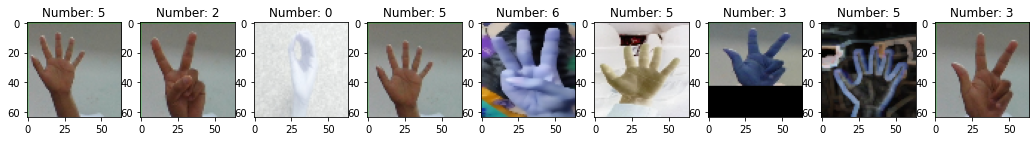

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtest[:9], ytest[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(ytest, predictions)
print(cm)

[[168   6  11   5   4   6   3   6   3   4]
 [  6 134  11   6   6   5   5   8   8   8]
 [  1  14 123   5   7   9   6  11   7   6]
 [ 12   9  11 131   6  10   6   5   8   4]
 [  5   5   7   6 134  12   8   6   8   6]
 [  6   7   8  12   8 133  10   4  10   8]
 [  3  10   5   8  12   7 122  11  10   4]
 [  9   8  10   7   8   6   6 119   5   1]
 [  9   7  13   5  11   5   6  14 134   4]
 [  3  10  13   7  11  11   4  10   6 139]]


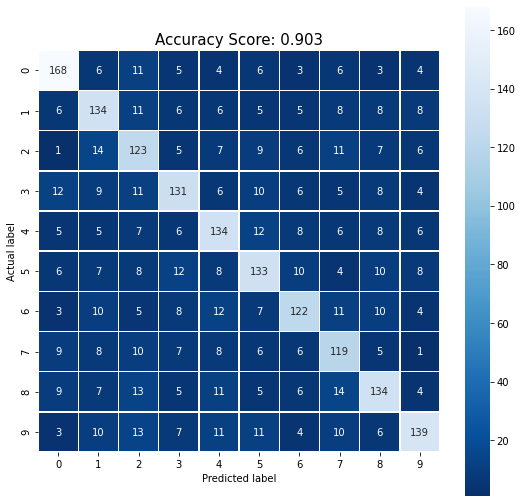

In [ ]:
plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(cm, annot=True, fmt="1", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);